<a href="https://colab.research.google.com/github/anishumairaa/Efficient-Delivery-Strategy/blob/main/PoslajuDelivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0/1 knapsack


In [ ]:
import time

parcels = [
    [10001, "Serdang", 1, 30, "Putrajaya", 18.3],
    [10002, "Putrajaya", 4, 35, "Cyberjaya", 10],
    [10003, "Cyberjaya", 2, 20, "Shah Alam", 35.5],
    [10004, "Shah Alam", 5, 40, "Bangi", 37.7],
    [10005, "Bangi", 5, 15, "Kajang", 7.3],
    [10006, "Kajang", 2, 15, "Serdang", 11],
    [10007, "Serdang", 2, 20, "Bukit Jalil", 12.3],
    [10008, "Bukit Jalil", 5, 40, "Puchong", 12.8],
    [10009, "Puchong", 3, 35, "Bangi", 26.5],
    [10010, "Bangi", 3, 42, "Kajang", 7.3],
    [10011, "Kajang", 4, 32, "Putrajaya", 17],
    [10012, "Putrajaya", 4, 60, "Cyberjaya", 10],
    [10013, "Cyberjaya", 3, 15, "Shah Alam", 35.5],
    [10014, "Shah Alam", 4, 35, "Bangi", 37.7],
    [10015, "Bangi", 5, 15, "Kajang", 7.3],
    [10016, "Kajang", 4, 32, "Putrajaya", 17],
    [10017, "Putrajaya", 4, 60, "Cyberjaya", 10],
    [10018, "Cyberjaya", 3, 15, "Shah Alam", 35.5],
    [10019, "Shah Alam", 4, 35, "Bangi", 37.7],
    [10020, "Serdang", 6, 40, "Kajang", 11],
    [10021, "Kajang", 4, 32, "Putrajaya", 17],
    [10022, "Putrajaya", 4, 60, "Cyberjaya", 10],
    [10023, "Cyberjaya", 3, 15, "Shah Alam", 35.5],
    [10024, "Shah Alam", 4, 35, "Bangi", 37.7],
    [10025, "Bangi", 3, 27, "Puchong", 26.5],
    [10026, "Puchong", 3, 12, "Bukit Jalil", 12.8],
    [10027, "Bukit Jalil", 4, 16, "Serdang", 12.3],
    [10028, "Serdang", 2, 12, "Putrajaya", 18.3],
    [10029, "Putrajaya", 1, 30, "Shah Alam", 36.3],
    [10030, "Shah Alam", 2, 16, "Puchong", 17.7],
    [10031, "Puchong", 4, 12, "Bangi", 26.5],
    [10032, "Bangi", 3, 30, "Kajang", 7.3],
    [10033, "Kajang", 5, 40, "Serdang", 11],
    [10034, "Serdang", 2, 12, "Putrajaya", 18.3],
    [10035, "Putrajaya", 6, 30, "Shah Alam", 25],
    [10036, "Shah Alam", 4, 16, "Bangi", 37.7],
    [10037, "Bangi", 2, 12, "Kajang", 7.3],
    [10038, "Kajang", 1, 30, "Serdang", 11],
    [10039, "Serdang", 1, 25, "Bukit Jalil", 12.3],
    [10040, "Bukit Jalil", 4, 30, "Serdang", 12.3]
]

truck_capacity = 81

start_time = time.time()

# Sort by profit-to-weight ratio
parcels.sort(key=lambda x: x[3] / x[2], reverse=True)

total_profit = 0
total_weight = 0
total_distance = 0
remaining_weight = truck_capacity
selected_parcels = []

# Start from parcel with highest profit-to-weight ratio
first_parcel = parcels[0]
current_location = first_parcel[1]

print("------- Parcel used in knapsack (Connected Path) -------")
print(f"{'Delivery from/to':40} {'Profit':<10} {'Weight':<10}")

while True:
    found = False
    for parcel in parcels:
        pid, location, weight, profit, delivery_loc, distance = parcel
        if parcel not in selected_parcels and location == current_location and weight <= remaining_weight:
            # Accept this parcel
            selected_parcels.append(parcel)
            total_profit += profit
            total_weight += weight
            total_distance += distance
            remaining_weight -= weight

            print(f"{location:20} --> {delivery_loc:20} {profit:<10.0f} {weight:<10.0f}")
            current_location = delivery_loc
            found = True
            break
    if not found:
        break

end_time = time.time()
duration = (end_time - start_time) * 1000  # ms

print(f"\nMaximum total profit in knapsack: RM{total_profit:.2f}")
print(f"Total weight used: {total_weight:.2f} kg out of {truck_capacity} kg")
print(f"Total distance traveled: {total_distance:.2f} km")
print(f"Time taken to select: {duration:.5f} ms")


------- Parcel used in knapsack (Connected Path) -------
Delivery from/to                         Profit     Weight    
Serdang              --> Putrajaya            30         1         
Putrajaya            --> Shah Alam            30         1         
Shah Alam            --> Bangi                35         4         
Bangi                --> Kajang               42         3         
Kajang               --> Serdang              30         1         
Serdang              --> Bukit Jalil          25         1         
Bukit Jalil          --> Puchong              40         5         
Puchong              --> Bangi                35         3         
Bangi                --> Kajang               30         3         
Kajang               --> Putrajaya            32         4         
Putrajaya            --> Cyberjaya            60         4         
Cyberjaya            --> Shah Alam            20         2         
Shah Alam            --> Bangi                35         4      

# **Prim's Algorithm**

## **Install independency to visualize the Minimum Spanning Tree**

In [ ]:
pip install networkx matplotlib


Minimum Spanning Tree (Prim's Algorithm):
Serdang -> Bukit Jalil: 12.3 km | Profit: 91 | Weight: 11kg
Putrajaya -> Cyberjaya: 10.0 km | Profit: 215 | Weight: 16kg
Bangi -> Kajang: 7.3 km | Profit: 114 | Weight: 18kg
Bukit Jalil -> Puchong: 12.8 km | Profit: 52 | Weight: 8kg
Kajang -> Putrajaya: 17.0 km | Profit: 96 | Weight: 12kg
Kajang -> Serdang: 11.0 km | Profit: 125 | Weight: 14kg
Puchong -> Shah Alam: 17.7 km | Profit: 16 | Weight: 2kg

Summary:
Total Distance: 88.1 km
Total Profit: 709
Total Weight: 81kg

✅ Total weight (81kg) is within truck capacity (81kg)

Algorithm execution time: 0.59 ms


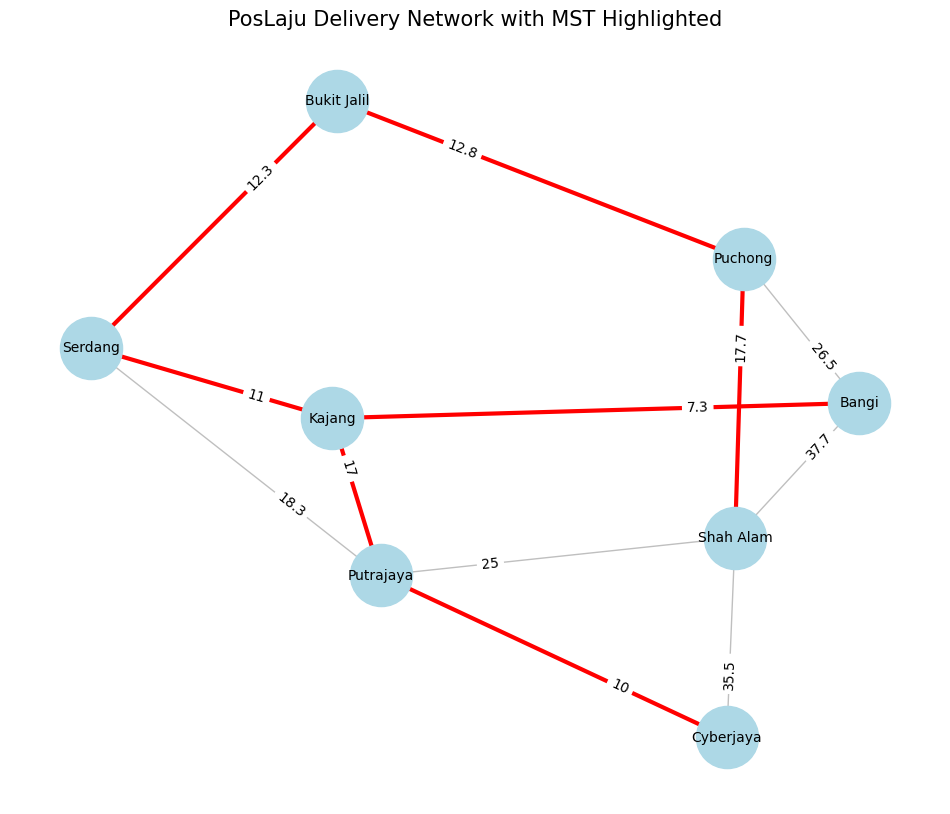

In [ ]:
import sys
import time
import networkx as nx
import matplotlib.pyplot as plt

# Delivery data: [ID, From, Items(kg), Profit, To, Distance(km)]
deliveries = [
    [10001, "Serdang", 6, 30, "Putrajaya", 18.3],
    [10002, "Putrajaya", 4, 35, "Cyberjaya", 10],
    [10003, "Cyberjaya", 2, 20, "Shah Alam", 35.5],
    [10004, "Shah Alam", 5, 40, "Bangi", 37.7],
    [10005, "Bangi", 5, 15, "Kajang", 7.3],
    [10006, "Kajang", 2, 15, "Serdang", 11],
    [10007, "Serdang", 2, 20, "Bukit Jalil", 12.3],
    [10008, "Bukit Jalil", 5, 40, "Puchong", 12.8],
    [10009, "Puchong", 3, 35, "Bangi", 26.5],
    [10010, "Bangi", 3, 42, "Kajang", 7.3],
    [10011, "Kajang", 4, 32, "Putrajaya", 17],
    [10012, "Putrajaya", 4, 60, "Cyberjaya", 10],
    [10013, "Cyberjaya", 3, 15, "Shah Alam", 35.5],
    [10014, "Shah Alam", 4, 35, "Bangi", 37.7],
    [10015, "Bangi", 5, 15, "Kajang", 7.3],
    [10016, "Kajang", 4, 32, "Putrajaya", 17],
    [10017, "Putrajaya", 4, 60, "Cyberjaya", 10],
    [10018, "Cyberjaya", 3, 15, "Shah Alam", 35.5],
    [10019, "Shah Alam", 4, 35, "Bangi", 37.7],
    [10020, "Serdang", 6, 40, "Kajang", 11],
    [10021, "Kajang", 4, 32, "Putrajaya", 17],
    [10022, "Putrajaya", 4, 60, "Cyberjaya", 10],
    [10023, "Cyberjaya", 3, 15, "Shah Alam", 35.5],
    [10024, "Shah Alam", 4, 35, "Bangi", 37.7],
    [10025, "Bangi", 3, 27, "Puchong", 26.5],
    [10026, "Puchong", 3, 12, "Bukit Jalil", 12.8],
    [10027, "Bukit Jalil", 4, 16, "Serdang", 12.3],
    [10028, "Serdang", 2, 12, "Putrajaya", 18.3],
    [10029, "Putrajaya", 1, 30, "Shah Alam", 36.3],
    [10030, "Shah Alam", 2, 16, "Puchong", 17.7],
    [10031, "Puchong", 4, 12, "Bangi", 26.5],
    [10032, "Bangi", 3, 30, "Kajang", 7.3],
    [10033, "Kajang", 5, 40, "Serdang", 11],
    [10034, "Serdang", 2, 12, "Putrajaya", 18.3],
    [10035, "Putrajaya", 1, 30, "Shah Alam", 25],
    [10036, "Shah Alam", 4, 16, "Bangi", 37.7],
    [10037, "Bangi", 2, 12, "Kajang", 7.3],
    [10038, "Kajang", 1, 30, "Serdang", 11],
    [10039, "Serdang", 1, 25, "Bukit Jalil", 12.3],
    [10040, "Bukit Jalil", 4, 30, "Serdang", 12.3]
]

# Truck capacity in kg
TRUCK_CAPACITY = 81

# Extract all unique cities
cities = sorted(list(set([d[1] for d in deliveries] + [d[4] for d in deliveries])))
V = len(cities)
INF = float('inf')

# Initialize graph matrices
graph = [[INF for _ in range(V)] for _ in range(V)]
profit = [[0 for _ in range(V)] for _ in range(V)]
weight = [[0 for _ in range(V)] for _ in range(V)]  # Using items as weight

# Helper function to get city index
def city_index(city):
    return cities.index(city)

# Build the graph from delivery data
for delivery in deliveries:
    from_idx = city_index(delivery[1])
    to_idx = city_index(delivery[4])
    distance = delivery[5]

    # Update distance (keep minimum distance if multiple entries)
    if distance < graph[from_idx][to_idx]:
        graph[from_idx][to_idx] = distance
        graph[to_idx][from_idx] = distance

    # Sum profit and weight (items) for all deliveries between cities
    profit[from_idx][to_idx] += delivery[3]
    profit[to_idx][from_idx] += delivery[3]
    weight[from_idx][to_idx] += delivery[2]  # Items represent weight in kg
    weight[to_idx][from_idx] += delivery[2]

# Set diagonal to 0
for i in range(V):
    graph[i][i] = 0

def prim_mst(graph):
    key = [INF] * V
    parent = [-1] * V
    mst_set = [False] * V
    key[0] = 0  # Start from first city (Serdang)

    for _ in range(V):
        # Find minimum key vertex
        min_key = INF
        u = -1
        for v in range(V):
            if not mst_set[v] and key[v] < min_key:
                min_key = key[v]
                u = v

        mst_set[u] = True

        # Update key values and parent index
        for v in range(V):
            if graph[u][v] != INF and not mst_set[v] and graph[u][v] < key[v]:
                key[v] = graph[u][v]
                parent[v] = u

    # Calculate MST statistics
    print("\nMinimum Spanning Tree (Prim's Algorithm):")
    total_distance = 0
    total_profit = 0
    total_weight = 0
    mst_edges = []
    route_plan = []

    for i in range(1, V):
        if parent[i] == -1:
            continue  # Skip if no parent (shouldn't happen in connected graph)

        city_from = cities[parent[i]]
        city_to = cities[i]
        distance = graph[i][parent[i]]
        edge_profit = profit[parent[i]][i]
        edge_weight = weight[parent[i]][i]

        print(f"{city_from} -> {city_to}: {distance:.1f} km | Profit: {edge_profit} | Weight: {edge_weight}kg")

        mst_edges.append((city_from, city_to))
        route_plan.append({
            'from': city_from,
            'to': city_to,
            'distance': distance,
            'profit': edge_profit,
            'weight': edge_weight
        })
        total_distance += distance
        total_profit += edge_profit
        total_weight += edge_weight

    print("\nSummary:")
    print(f"Total Distance: {total_distance:.1f} km")
    print(f"Total Profit: {total_profit}")
    print(f"Total Weight: {total_weight}kg")

    # Check truck capacity
    if total_weight > TRUCK_CAPACITY:
        print(f"\n⚠️ Warning: Total weight ({total_weight}kg) exceeds truck capacity ({TRUCK_CAPACITY}kg)")
        print("Consider these optimizations:")
        print("1. Remove heaviest routes first")
        print("2. Split deliveries into multiple trips")
        print("3. Find alternative routes with lower weight")
    else:
        print(f"\n✅ Total weight ({total_weight}kg) is within truck capacity ({TRUCK_CAPACITY}kg)")

    return route_plan, total_distance, total_profit, total_weight, mst_edges

def visualize_graph(graph, cities, highlight_edges, title):
    G = nx.Graph()

    # Add all nodes
    for city in cities:
        G.add_node(city)

    # Add all edges with weights
    for i in range(len(cities)):
        for j in range(i+1, len(cities)):
            if graph[i][j] != INF:
                G.add_edge(cities[i], cities[j], weight=graph[i][j])

    # Create layout
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 10))

    # Draw all edges (gray, thin)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.5)

    # Draw highlighted edges (red, thick)
    nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, edge_color='red', width=3)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

    plt.title(title, size=15)
    plt.axis('off')
    plt.show()

def main():
    # Time measurement starts here (excluding visualization)
    start_time = time.time()

    # Run Prim's algorithm for MST and get statistics
    route_plan, total_distance, total_profit, total_weight, mst_edges = prim_mst(graph)

    # Time measurement ends here (before visualization)
    end_time = time.time()
    duration = (end_time - start_time) * 1000
    print(f"\nAlgorithm execution time: {duration:.2f} ms")

    # Visualization (not included in timing)
    visualize_graph(graph, cities, mst_edges, "PosLaju Delivery Network with MST Highlighted")

if __name__ == "__main__":
    main()